<a href="https://colab.research.google.com/github/sskamalapurkar/Suprvised_ML_Regression_capstone_project/blob/main/Ted_Talk_Views_Prediction_Sayali_Kamalapurkar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

---





## <b>TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over 4,000 TED talks including transcripts in many languages.

##<b>Founded in 1984 by Richard Salman as a nonprofit organization that aimed at bringing experts from the fields of Technology, Entertainment, and Design together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan, and Bill Gates.

## <b>The main objective is to build a predictive model, which could help in predicting the views of the videos uploaded on the TEDx website.





# **Introduction**

---



In [1]:
#importing the libraries
import pandas as pd
import numpy as np
from numpy import math
from datetime import datetime
#Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#libraries for Regression models
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR
import time
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import ensemble

import warnings
warnings.filterwarnings('ignore')

In [2]:
file_path = '/content/drive/MyDrive/Supervised ML - Regression/data_ted_talks.csv'
DataFrame = pd.read_csv(file_path)
df = DataFrame.copy()

In [3]:
df.shape

(4005, 19)

In [4]:
df.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

In [6]:
df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

In [7]:
#Listing all categorical columns
cat_cols = list(df.select_dtypes(include = 'object').columns)
print(f'Number of Categorical Columns: {len(cat_cols)}')
print(f'Categorical Columns: {cat_cols}')

Number of Categorical Columns: 15
Categorical Columns: ['title', 'speaker_1', 'all_speakers', 'occupations', 'about_speakers', 'recorded_date', 'published_date', 'event', 'native_lang', 'available_lang', 'topics', 'related_talks', 'url', 'description', 'transcript']


In [8]:
#Listing all numerical columns
num_cols = list(df.select_dtypes(exclude = 'object').columns)
print(f'Number of Continuous Columns: {len(num_cols)}')
print(f'Continuous Columns: {num_cols}')

Number of Continuous Columns: 4
Continuous Columns: ['talk_id', 'views', 'comments', 'duration']


In [9]:
#Statistics for Numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
talk_id,4005.0,1.243254e+04,1.744758e+04,1.0,1252.0,2333.0,23777.0,62794.0
views,4005.0,2.148006e+06,3.451226e+06,0.0,882069.0,1375508.0,2133110.0,65051954.0
comments,3350.0,1.619970e+02,2.688389e+02,0.0,38.0,89.0,188.0,6449.0
duration,4005.0,7.240112e+02,3.617755e+02,60.0,393.0,738.0,974.0,3922.0


In [10]:
#Statistics for Categorical columns
df.describe(include = 'object').T

,count,unique,top,freq
title,4005,4005,Averting the climate crisis,1
speaker_1,4005,3274,Alex Gendler,34
all_speakers,4001,3306,{0: 'Alex Gendler'},34
occupations,3483,2049,{0: ['writer']},53
about_speakers,3502,2977,{0: 'Alex Rosenthal takes everyday experiences...,10
recorded_date,4004,1334,2017-04-24,97
published_date,4005,2962,2017-09-07,27
event,4005,459,TED-Ed,556
native_lang,4005,12,en,3957
available_lang,4005,3902,['en'],24


In [11]:
#checking for duplicates
len(df[df.duplicated()])

0

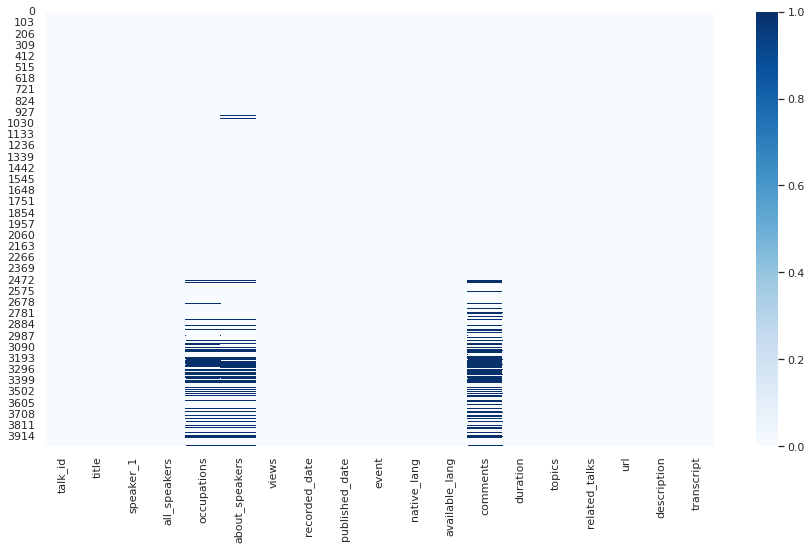

In [12]:
#Plotting Heatmap to see columns having null values
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df.isna(),cmap='Blues')

In [13]:
df.isna().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

In [14]:
df['occupations'].fillna('other', inplace = True)
df['comments'].fillna(df['comments'].mean(), inplace = True)
df.drop('about_speakers', axis = 1, inplace = True)
df.isna().sum()

talk_id           0
title             0
speaker_1         0
all_speakers      4
occupations       0
views             0
recorded_date     1
published_date    0
event             0
native_lang       0
available_lang    0
comments          0
duration          0
topics            0
related_talks     0
url               0
description       0
transcript        0
dtype: int64

In [15]:
df['published_date'] = pd.to_datetime(df['published_date'])

In [16]:
df['published_year'] = df['published_date'].dt.year
df['published_month'] = df['published_date'].dt.month
df['published_day'] = df['published_date'].dt.day_name()

In [17]:
df.head()

,talk_id,title,speaker_1,all_speakers,occupations,views,recorded_date,published_date,event,native_lang,...,comments,duration,topics,related_talks,url,description,transcript,published_year,published_month,published_day
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},3523392,2006-02-25,2006-06-27,TED2006,en,...,272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",2006,6,Tuesday
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},14501685,2006-02-22,2006-06-27,TED2006,en,...,628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",2006,6,Tuesday
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},1920832,2006-02-24,2006-06-27,TED2006,en,...,124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun...",2006,6,Tuesday
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},2664069,2006-02-26,2006-06-27,TED2006,en,...,219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...,2006,6,Tuesday
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}",65051954,2006-02-25,2006-06-27,TED2006,en,...,4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...,2006,6,Tuesday


In [18]:
df['published_year'].value_counts()

2019    702
2018    477
2017    315
2012    303
2011    255
2013    242
2016    242
2014    240
2010    230
2015    220
2009    215
2020    211
2008    185
2007    119
2006     49
Name: published_year, dtype: int64

Text(0, 0.5, 'Number of Ted_talks published')

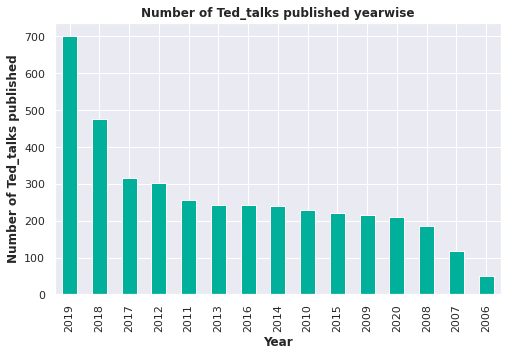

In [19]:
year_count = df['published_year'].value_counts()
year_count.plot(kind = 'bar', color = '#00b09b',figsize=(8,5))
plt.title("Number of Ted_talks published yearwise", weight ='bold')
plt.xlabel("Year", weight='bold')
plt.ylabel('Number of Ted_talks published', weight='bold')

Text(0, 0.5, 'Average views')

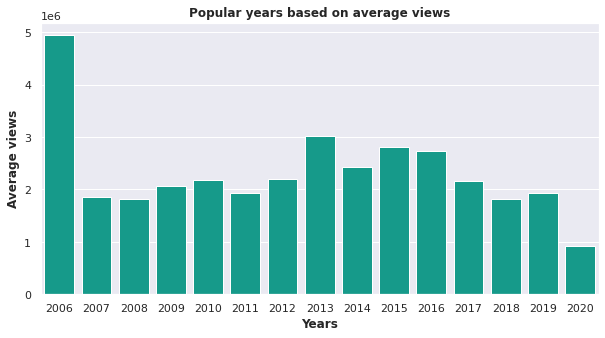

In [20]:
popular_year_acc_to_avg_views = df[['published_year','views']].groupby('published_year').agg({'views' : 'mean'})
popular_year_acc_to_avg_views.reset_index(inplace = True)
plt.figure(figsize=(10,5))
plt.title('Popular years based on average views', weight = 'bold')
sns.barplot(data = popular_year_acc_to_avg_views, x='published_year',y='views', color = '#00b09b')
plt.xlabel("Years", weight = 'bold')
plt.ylabel("Average views", weight = 'bold')

In [21]:
df['published_month'].value_counts()

4     423
3     419
2     412
10    350
1     348
9     347
5     312
6     310
11    305
7     278
12    265
8     236
Name: published_month, dtype: int64

Text(0, 0.5, 'Number of Ted_talks published')

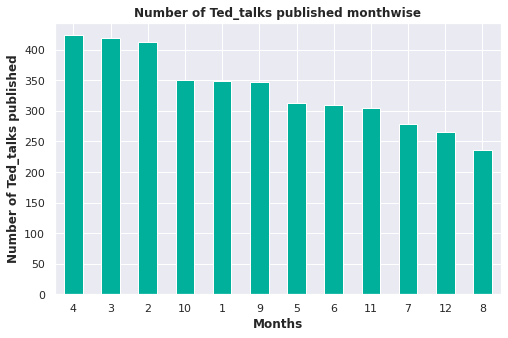

In [22]:
month_count = df['published_month'].value_counts()
month_count.plot(kind = 'bar', color = '#00b09b',figsize=(8,5))
plt.xticks(rotation=0)
plt.title("Number of Ted_talks published monthwise", weight ='bold')
plt.xlabel("Months", weight='bold')
plt.ylabel('Number of Ted_talks published', weight='bold')

Text(0, 0.5, 'Average views')

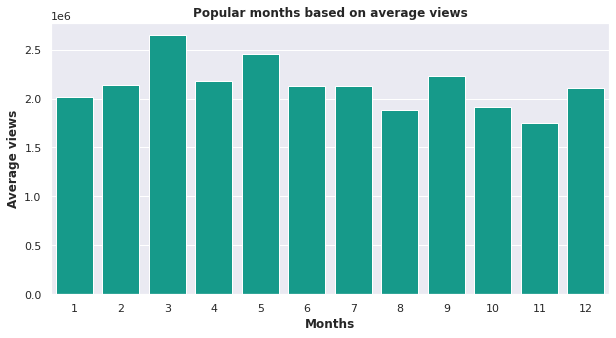

In [23]:
popular_month_acc_to_avg_views = df[['published_month','views']].groupby('published_month').agg({'views' : 'mean'})
popular_month_acc_to_avg_views.reset_index(inplace = True)
plt.figure(figsize=(10,5))
plt.title('Popular months based on average views', weight = 'bold')
sns.barplot(data = popular_month_acc_to_avg_views, x='published_month',y='views', color = '#00b09b')
plt.xlabel("Months", weight = 'bold')
plt.ylabel("Average views", weight = 'bold')

In [24]:
df['published_day'].value_counts()

Tuesday      857
Thursday     832
Friday       789
Monday       727
Wednesday    703
Sunday        55
Saturday      42
Name: published_day, dtype: int64

Text(0, 0.5, 'Number of Ted_talks published')

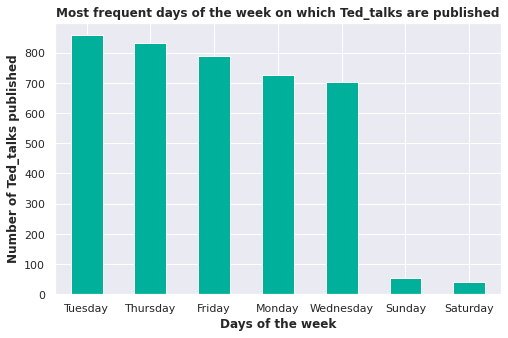

In [25]:
day_count = df['published_day'].value_counts()
day_count.plot(kind = 'bar', color = '#00b09b',figsize=(8,5))
plt.xticks(rotation=0)
plt.title("Most frequent days of the week on which Ted_talks are published", weight ='bold')
plt.xlabel("Days of the week", weight='bold')
plt.ylabel('Number of Ted_talks published', weight='bold')

Text(0, 0.5, 'Average views')

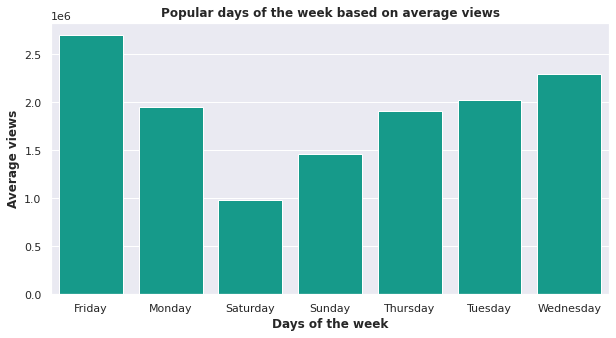

In [26]:
popular_day_of_the_week_acc_to_avg_views = df[['published_day','views']].groupby('published_day').agg({'views' : 'mean'})
popular_day_of_the_week_acc_to_avg_views.reset_index(inplace = True)
plt.figure(figsize=(10,5))
plt.title('Popular days of the week based on average views', weight = 'bold')
sns.barplot(data = popular_day_of_the_week_acc_to_avg_views, x='published_day',y='views', color = '#00b09b')
plt.xlabel("Days of the week", weight = 'bold')
plt.ylabel("Average views", weight = 'bold')

In [27]:
top_Ted_talks_titles_speakers = df.nlargest(10, 'views')
top_Ted_talks_titles_speakers_df = top_Ted_talks_titles_speakers[['title','speaker_1','views']]
top_Ted_talks_titles_speakers_df

,title,speaker_1,views
4,Do schools kill creativity?,Sir Ken Robinson,65051954
1296,Your body language may shape who you are,Amy Cuddy,57074270
2062,This is what happens when you reply to spam email,James Veitch,56932551
646,How great leaders inspire action,Simon Sinek,49730580
796,The power of vulnerability,Brené Brown,47544833
1724,How to speak so that people want to listen,Julian Treasure,41504331
2108,Inside the mind of a master procrastinator,Tim Urban,37976820
1366,"Looks aren't everything. Believe me, I'm a model.",Cameron Russell,33874546
2724,My philosophy for a happy life,Sam Berns,33691484
1898,The next outbreak? We're not ready,Bill Gates,33521780


In [28]:
top_speakers = df.groupby('speaker_1').agg({'views' : 'sum'}).nlargest(10,['views'])
top_speakers

,views
speaker_1,
Alex Gendler,117619583
Sir Ken Robinson,84380518
James Veitch,78843641
Simon Sinek,62661183
Brené Brown,61285977
Bill Gates,57107176
Amy Cuddy,57074270
Julian Treasure,54799681
Hans Rosling,39871561


Text(0, 0.5, 'Sum of number of views')

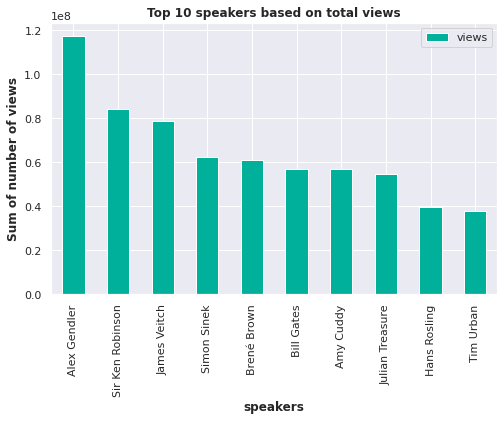

In [29]:
top_speakers.plot(kind = 'bar', color = '#00b09b',figsize=(8,5))
plt.title("Top 10 speakers based on total views", weight = 'bold')
plt.xlabel("speakers", weight = 'bold')
plt.ylabel("Sum of number of views", weight = 'bold')

In [30]:
top_speakers_based_on_avg_views = df.groupby('speaker_1').agg({'views' : 'mean'}).nlargest(10,['views'])
top_speakers_based_on_avg_views

,views
speaker_1,
Amy Cuddy,57074270.0
James Veitch,39421820.5
Tim Urban,37976820.0
Cameron Russell,33874546.0
Sam Berns,33691484.0
Robert Waldinger,32396714.0
Simon Sinek,31330591.5
Mary Roach,30977634.0
Brené Brown,30642988.5


Text(0, 0.5, 'Average views')

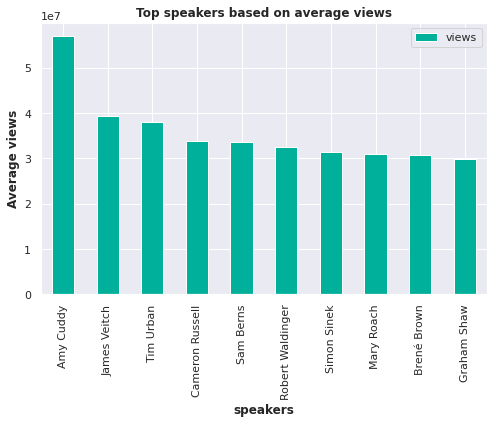

In [31]:
top_speakers_based_on_avg_views.plot(kind = 'bar', color = '#00b09b',figsize=(8,5))
plt.title("Top speakers based on average views", weight = 'bold')
plt.xlabel("speakers", weight = 'bold')
plt.ylabel("Average views", weight = 'bold')

In [32]:
top_events = df.groupby('event').agg({'views' : 'sum'}).nlargest(10,['views'])
top_events

,views
event,
TED-Ed,1145357780
TED2015,247702961
TED2014,240295871
TEDGlobal 2013,235410234
TED2017,227847725
TED2016,227358612
TED2013,225967516
TED2012,197746106
TED2018,196346377


Text(0, 0.5, 'Total views')

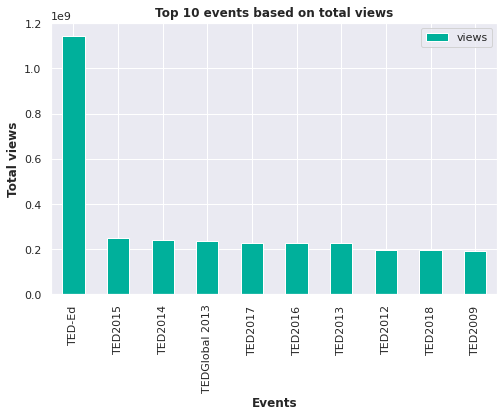

In [33]:
top_events.plot(kind = 'bar', color = '#00b09b',figsize=(8,5))
plt.title("Top 10 events based on total views", weight = 'bold')
plt.xlabel("Events", weight = 'bold')
plt.ylabel("Total views", weight = 'bold')

Text(0, 0.5, 'Number of views')

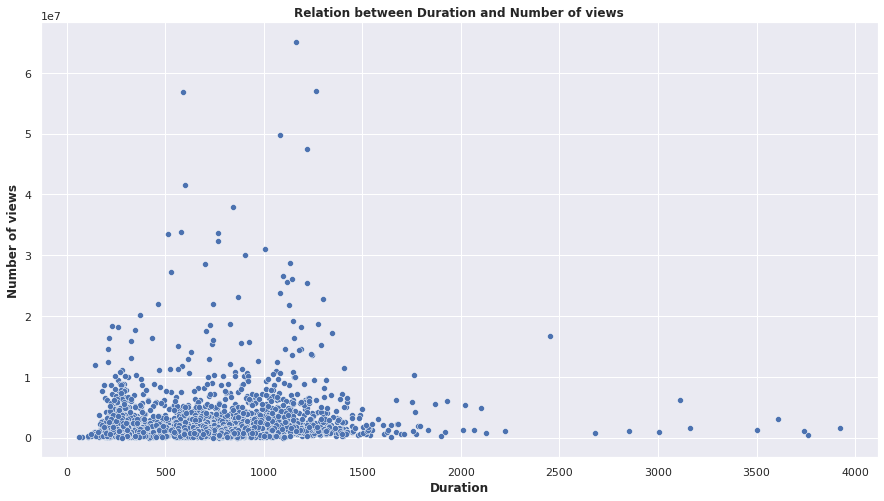

In [34]:
sns.scatterplot(data = df, x='duration', y='views')
plt.title("Relation between Duration and Number of views", weight = 'bold')
plt.xlabel("Duration", weight = 'bold')
plt.ylabel("Number of views", weight = 'bold')

Text(0, 0.5, 'Number of Views')

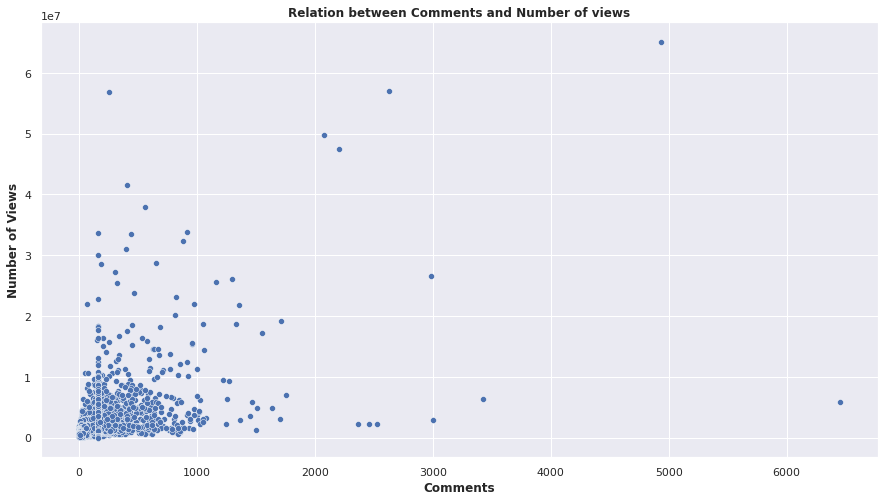

In [35]:
sns.scatterplot(data = df, x='comments', y='views')
plt.title("Relation between Comments and Number of views", weight = 'bold')
plt.xlabel("Comments", weight = 'bold')
plt.ylabel("Number of Views", weight = 'bold')

Text(0, 0.5, 'Number of Ted_talks published')

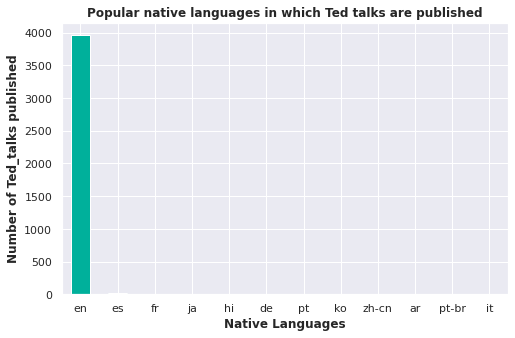

In [36]:
native_lang_count = df['native_lang'].value_counts()
native_lang_count.plot(kind = 'bar', color = '#00b09b',figsize=(8,5))
plt.xticks(rotation=0)
plt.title("Popular native languages in which Ted talks are published", weight ='bold')
plt.xlabel("Native Languages", weight='bold')
plt.ylabel('Number of Ted_talks published', weight='bold')

Text(0, 0.5, 'Average views')

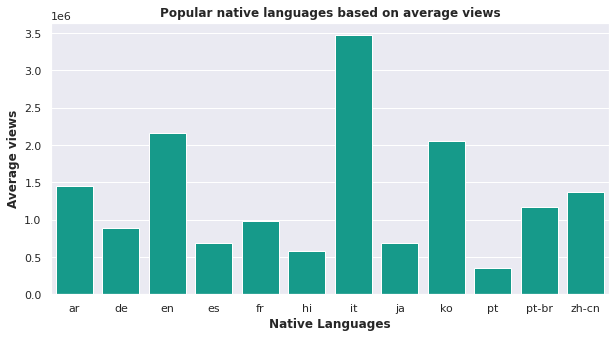

In [37]:
popular_native_lang_acc_to_avg_views = df[['native_lang','views']].groupby('native_lang').agg({'views' : 'mean'})
popular_native_lang_acc_to_avg_views.reset_index(inplace = True)
plt.figure(figsize=(10,5))
plt.title('Popular native languages based on average views', weight = 'bold')
sns.barplot(data = popular_native_lang_acc_to_avg_views, x='native_lang',y='views', color = '#00b09b')
plt.xlabel("Native Languages", weight = 'bold')
plt.ylabel("Average views", weight = 'bold')

In [38]:
#importing the wordcloud
from wordcloud import WordCloud,ImageColorGenerator

There are 157160 words in the combination of all titles.


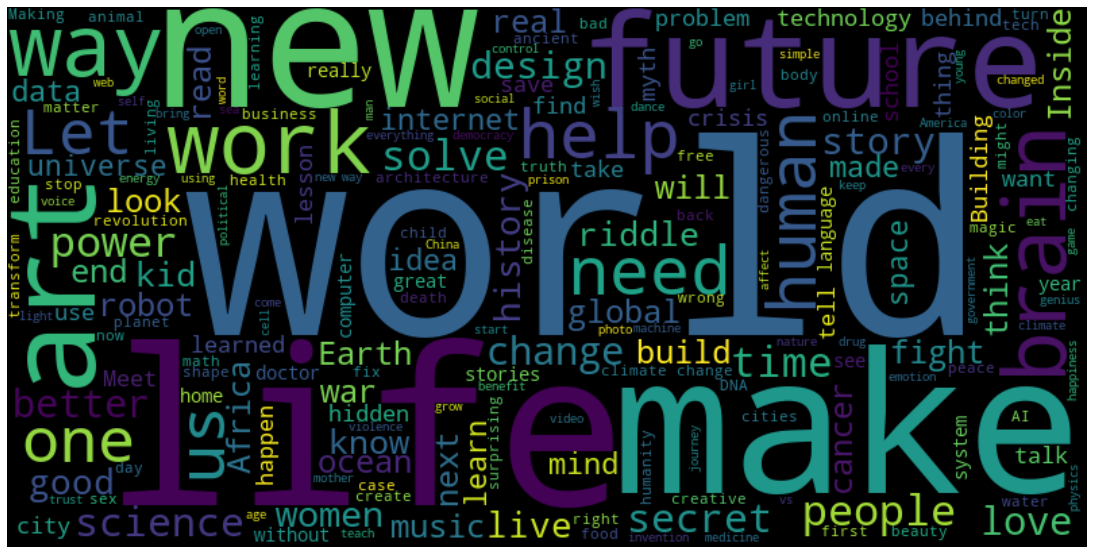

In [39]:
#making of word cloud from title column
text = " ".join(topic for topic in df.title.astype(str))
print ("There are {} words in the combination of all titles.".format(len(text)))

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="#000000", width=800, height=400).generate(text)

plt.axis("off")
plt.rcParams["figure.figsize"] = (15,5)
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

There are 404126 words in the combination of all topics.


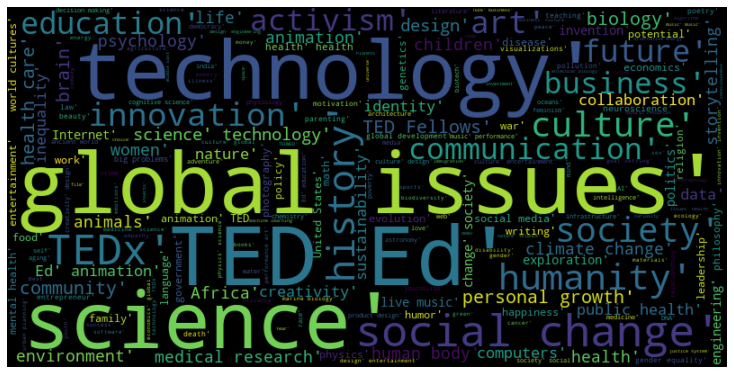

In [40]:
from wordcloud import WordCloud,ImageColorGenerator
text = " ".join(topic for topic in df.topics.astype(str))
print ("There are {} words in the combination of all topics.".format(len(text)))

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="#000000", width=800, height=400).generate(text)

plt.axis("off")
plt.rcParams["figure.figsize"] = (15,5)
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

There are 107517 words in the combination of all topics.


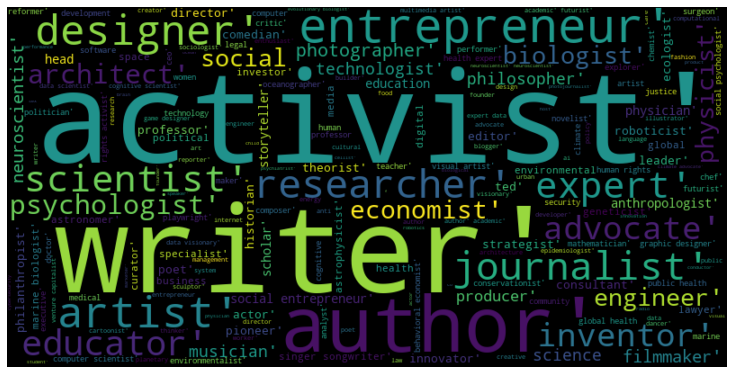

In [41]:
from wordcloud import WordCloud,ImageColorGenerator
text = " ".join(occupations for occupations in df.occupations.astype(str))
print ("There are {} words in the combination of all topics.".format(len(text)))

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="#000000", width=800, height=400).generate(text)

plt.axis("off")
plt.rcParams["figure.figsize"] = (15,5)
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

There are 647690 words in the combination of all topics.


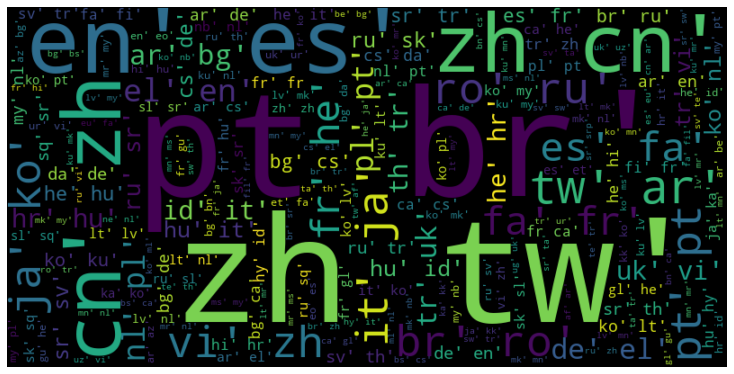

In [42]:
from wordcloud import WordCloud,ImageColorGenerator
text = " ".join(available_lang for available_lang in df.available_lang.astype(str))
print ("There are {} words in the combination of all topics.".format(len(text)))

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="#000000", width=800, height=400).generate(text)

plt.axis("off")
plt.rcParams["figure.figsize"] = (15,5)
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

There are 1139613 words in the combination of all topics.


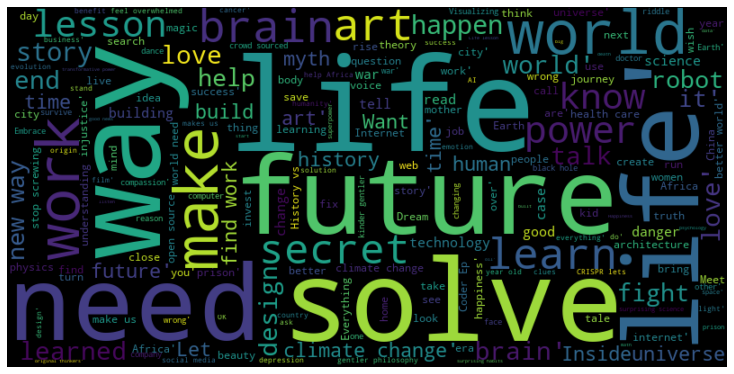

In [43]:
from wordcloud import WordCloud,ImageColorGenerator
text = " ".join(related_talks for related_talks in df.related_talks.astype(str))
print ("There are {} words in the combination of all topics.".format(len(text)))

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="#000000", width=800, height=400).generate(text)

plt.axis("off")
plt.rcParams["figure.figsize"] = (15,5)
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

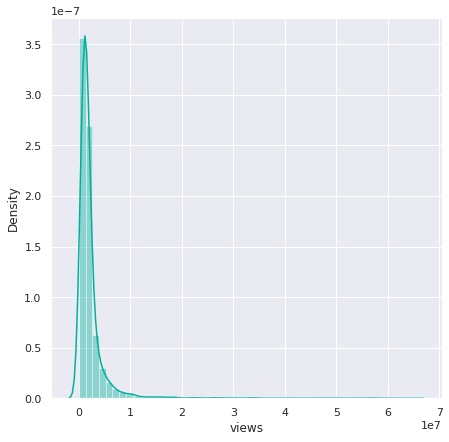

In [44]:
# Dependent variable 'Views'
plt.figure(figsize=(7,7))
sns.distplot(df['views'],color="#00b09b")

In [45]:
# Dependent variable 'Views'
#plt.figure(figsize=(7,7))
#sns.distplot(np.log10(df['views']),color="#00b09b")

In [46]:
correlation = df.corr()
correlation.views

talk_id           -0.113291
views              1.000000
comments           0.467859
duration           0.073642
published_year    -0.053478
published_month   -0.032394
Name: views, dtype: float64